# Part II - Effects of Loan Characteristics on Monthly Loan Payment Amount
## by Kemdirim Njoku

## Investigation Overview
In this investigation, I wanted to look at the features of loans that could be used to predict their Monthly Loan payment. The main focus was on the following loan features: Loan Original Amount, Term, Income Range.


## Dataset Overview
This data set contained 113,937 loans with 81 variables on each loan entry, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I focused my exploration on about eight (8) variables from the data set which include: MonthlyLoanPayment, LoanOriginalAmount, StatedMonthlyIncome, BorrowerAPR, Investors, Term, Employment Status, Income Range.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv("prosperLoanData.csv")

In [4]:
#combine "Not employed", "Not sdisplayed" and "$0" Income ranges together

df_loan['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [5]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df_loan['IncomeRange'] = df_loan['IncomeRange'].astype(ordered_var)

## Distribution of Monthly Loan Payment
The Monthly Loan Payment variable in the dataset takes on a large range of values and produces a long tailed distribution. Plotted on a logarithmic scale, the distribution of Monthly Loan Payment is skewed to the right.

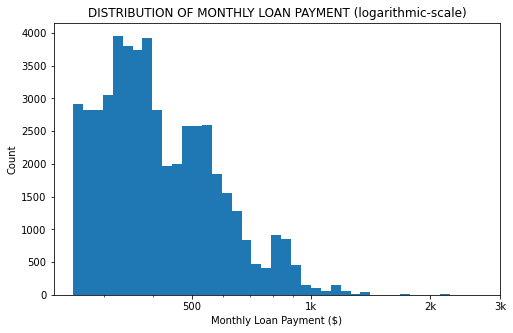

In [6]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_loan["MonthlyLoanPayment"].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = "MonthlyLoanPayment", bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3], [500, '1k', '2k', '3k'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Count')
plt.title("DISTRIBUTION OF MONTHLY LOAN PAYMENT (logarithmic-scale)")
plt.show()

## Distribution of Loan Original Amount

The Loan Original Amount shows very large spikes in the frequency mostly at bars representing nearest thousand. With this We can assume that majority of the loans taken where whole (rounded) thousands (e.g. 5k, 10k, 15k, 20k, 25k).

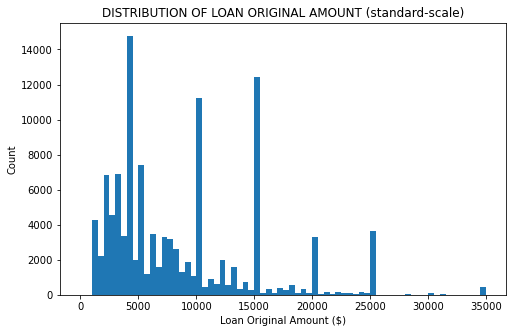

In [7]:
# plotting LoanOriginalAmount on a standard scale
binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title("DISTRIBUTION OF LOAN ORIGINAL AMOUNT (standard-scale)")
plt.show()

## Monthly Loan Payment vs. Loan Original Amount

This plot comprising of all the data points shows a positive correlation between the MonthlyLoanPayment and LoanOriginalAmount. We can thus say that as the Loan Original Amount increases, a corresponding increase in the Monthly Loan Payment is observed.

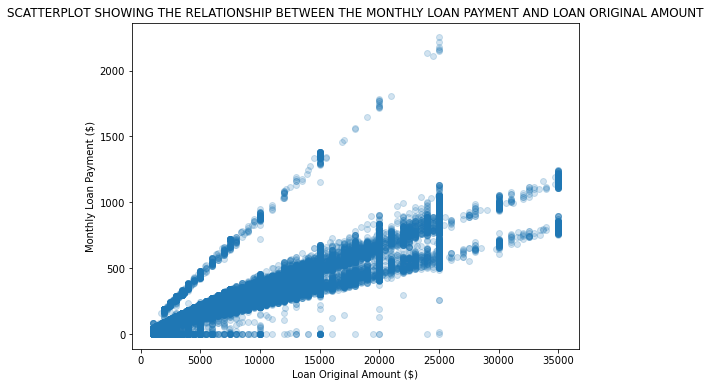

In [8]:
# lets make a scatter plot of MonthlyLoanPayment vs. LoanOriginalAmount

plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', alpha = 2/10)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Monthly Loan Payment ($)')
plt.title('SCATTERPLOT SHOWING THE RELATIONSHIP BETWEEN THE MONTHLY LOAN PAYMENT AND LOAN ORIGINAL AMOUNT')
plt.show()

## Monthly Loan Payment and Loan Original Amount by Income Range

Income Range doesn't seem to show any significant effect on the relationship between Monthly Loan Payment and Loan Original Amount.

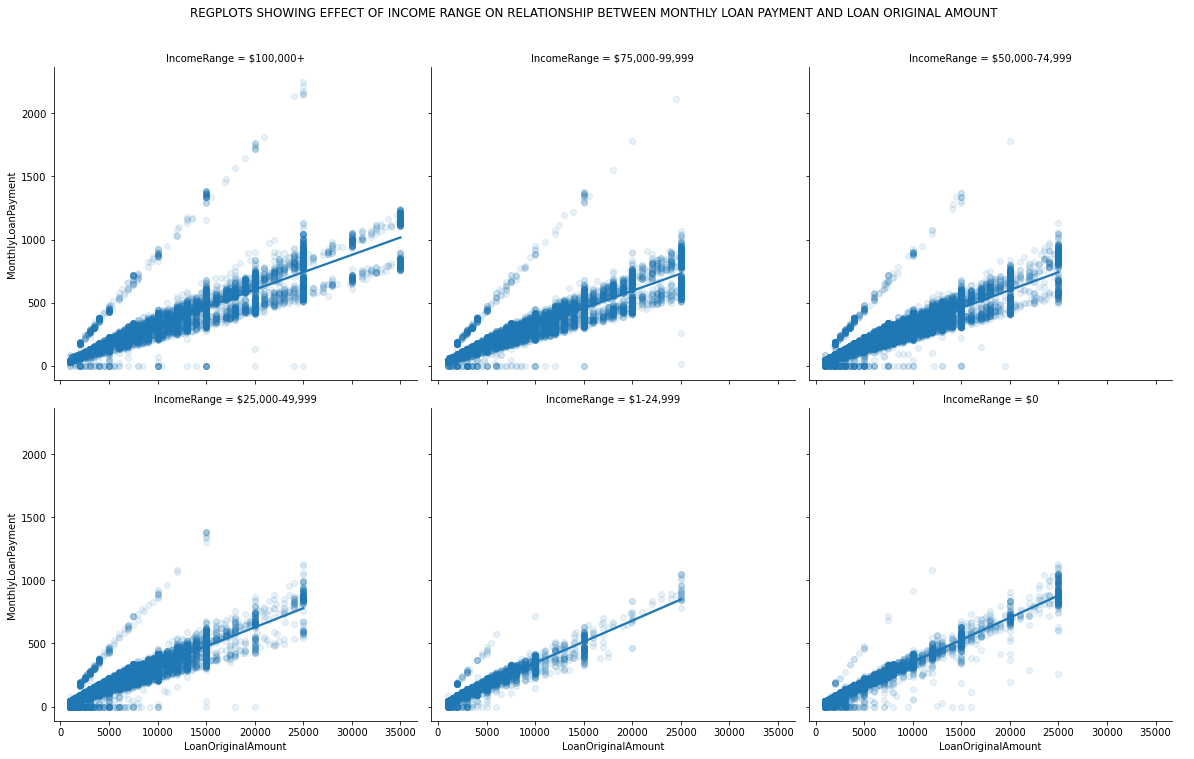

In [9]:
# IncomeRange effect on relationship of Monthly payment and loan amount
g=sns.FacetGrid(data=df_loan, aspect=1.1, height=5, col='IncomeRange', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.fig.suptitle("REGPLOTS SHOWING EFFECT OF INCOME RANGE ON RELATIONSHIP BETWEEN MONTHLY LOAN PAYMENT AND LOAN ORIGINAL AMOUNT", y=1.05);

## Monthly Loan Payment and Loan Original Amount by Term

This plot shows that as the term increases there seems to be a decrease in the Monthly Loan Payment and an increase in the Loan Original Amount. Although a positive correlation can be observed.

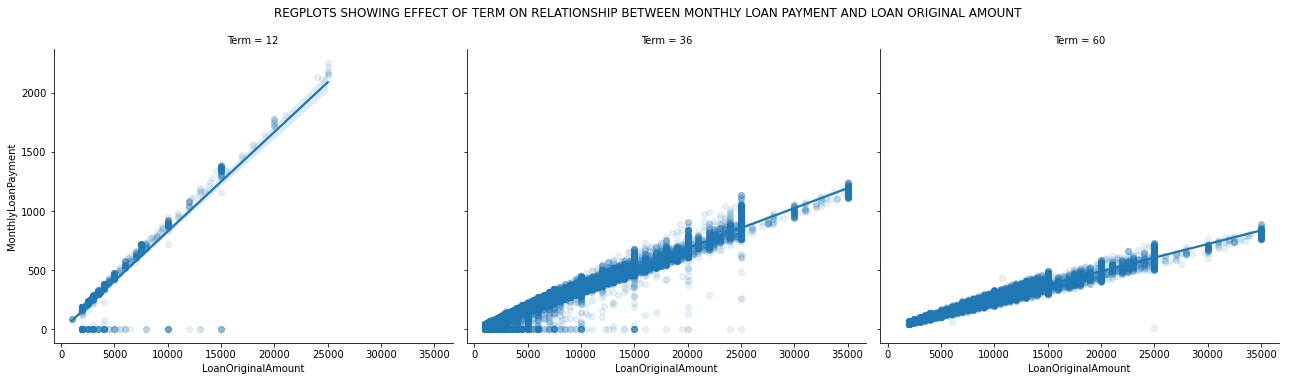

In [10]:
# Term effect on relationship of Monthly payment and loan amount
g=sns.FacetGrid(data=df_loan, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();
g.fig.suptitle("REGPLOTS SHOWING EFFECT OF TERM ON RELATIONSHIP BETWEEN MONTHLY LOAN PAYMENT AND LOAN ORIGINAL AMOUNT", y=1.05);

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt